In [363]:
#!pip install keras

In [364]:
import sys
assert sys.version_info >= (3, 7)

In [365]:
from packaging import version
import sklearn
import keras
from keras import layers

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
import matplotlib.pyplot as plt

from pathlib import Path
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd


In [366]:
images_path = Path() / "images" / "classification"
images_path.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### LOAD CIFAR10 DATASET

In [367]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [368]:
print("Training data shape:", train_images.shape)  # Expected output: (50000, 32, 32, 3)

Training data shape: (50000, 32, 32, 3)


In [369]:
print("Training labels shape:", train_labels.shape)  # Expected output: (50000, 1)

Training labels shape: (50000, 1)


In [370]:
print("Test data shape:", test_images.shape)  # Expected output: (10000, 32, 32, 3)

Test data shape: (10000, 32, 32, 3)


In [371]:
print("Test labels shape:", test_labels.shape)  # Expected output: (10000, 1)

Test labels shape: (10000, 1)


In [372]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Create a validation set from the training data
val_images, val_labels = train_images[:5000], train_labels[:5000] # Take the first 20% for validation set
new_train_images, new_train_labels = train_images[5000:], train_labels[5000:] #Take the rest (45,0000 images and labels) for new training set

print("Validation data shape:", val_images.shape)  # 20% is used for validation set (5000, 32, 32, 3)
print("New training data shape:", new_train_images.shape)  # 80% is used for training set (45000, 32, 32, 3)

Validation data shape: (5000, 32, 32, 3)
New training data shape: (45000, 32, 32, 3)


### DISPLAY IMAGES

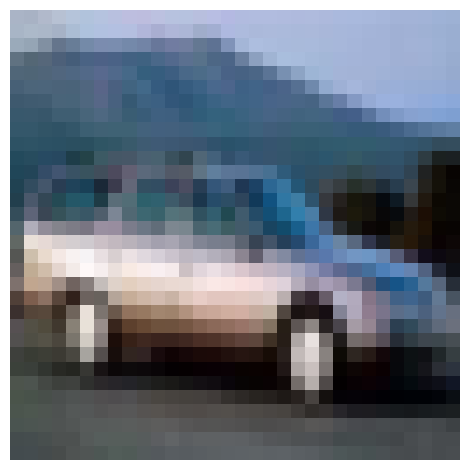

In [373]:
import matplotlib.pyplot as plt

def plot_digit(train_images):
    image = train_images.reshape(32, 32, 3)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_image = X_train[4]
plot_digit(some_image)
save_fig("some_image_plot")  # extra code
plt.show()

In [374]:
# Assign categories
categories = ['airplaine', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [375]:
# Checking to see if image matched the label
some_label_4 = y_train[4][0]
label_name_4 = categories[some_label_4]
print(label_name_4)

car


In [376]:
some_label_55 = y_train[55][0]
label_name_55 = categories[some_label_55]
print(label_name_55)

bird


In [377]:
# Check the dimention of an image
print(train_images[55].shape)

(32, 32, 3)


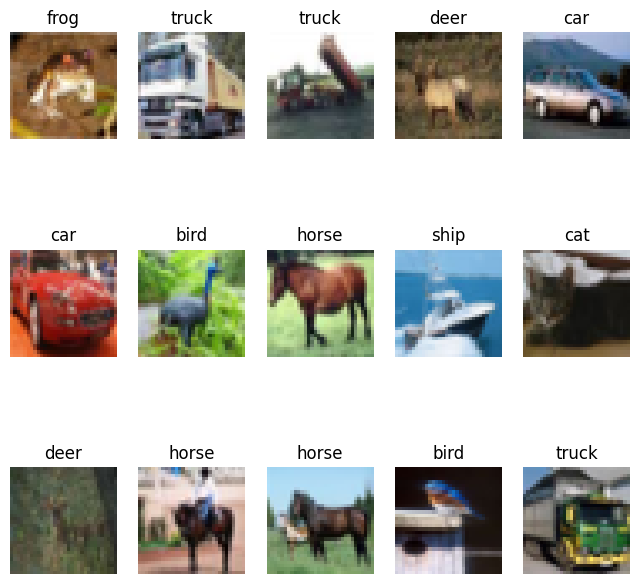

In [378]:
import matplotlib.pyplot as plt

# Display images in rows and columns
plt.figure(figsize=(8, 8))  # Set image to size 8 X 8
for i in range(15): # Display the first 15 images
    plt.subplot(3, 5, i + 1) # 3 rows and 5 columns
    plt.imshow(train_images[i]) # plot images
    plt.title(categories[train_labels[i][0]])  # plot labels
    plt.axis('off')  # Hides the axis labels
plt.show() # Display images and labels

### MODEL TRAINING with SGD ALGORITHM on TRAINING DATASET

In [379]:
car_label_index = categories.index('car')
car_train_images = train_images[train_labels.flatten() == car_label_index]
car_test_images = test_images[test_labels.flatten() == car_label_index]

print(car_train_images.shape)
print(car_test_images.shape)

(5000, 32, 32, 3)
(1000, 32, 32, 3)


In [380]:
n_train_samples = train_images.shape[0]
train_images_reshaped = train_images.reshape(n_train_samples, -1)  # Flatten the images

n_test_samples = test_images.shape[0]
test_images_reshaped = test_images.reshape(n_test_samples, -1)


# This will create a boolean array where True represents 'car' and False represents 'not car'
car_train_labels = (train_labels.flatten() == car_label_index)
car_test_labels = (test_labels.flatten() == car_label_index)

In [387]:
# Set up a model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

img_height = 32
img_width = 32
num_categories = len(categories)

tf.random.set_seed(42)
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='softmax'),
  layers.Dense(num_categories)
])

In [382]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
model.fit(train_images_reshaped, car_train_labels)  # Use the reshaped images and binary labels

SGDClassifier(random_state=42)

### MODEL PREDICTION

In [383]:
some_image_flattened = some_image.reshape(1, -1)
predicted_label = sgd_clf.predict(some_image_flattened)

print("Predicted Label:", predicted_label)

Predicted Label: [False]


In [384]:
from sklearn.metrics import accuracy_score, confusion_matrix

train_predictions = sgd_clf.predict(train_images_reshaped)
print("Training Accuracy:", accuracy_score(car_train_labels, train_predictions))
print("Confusion Matrix:\n", confusion_matrix(car_train_labels, train_predictions))


Training Accuracy: 0.92322
Confusion Matrix:
 [[44431   569]
 [ 3270  1730]]


### MODEL PREDICTION ON TEST DATASET

In [385]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming test_images_reshaped has been prepared similar to train_images_reshaped
test_predictions = sgd_clf.predict(test_images_reshaped)

# Calculate metrics
accuracy = accuracy_score(car_test_labels, test_predictions)
precision = precision_score(car_test_labels, test_predictions)
recall = recall_score(car_test_labels, test_predictions)
f1 = f1_score(car_test_labels, test_predictions)
conf_matrix = confusion_matrix(car_test_labels, test_predictions)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9102
Precision: 0.624390243902439
Recall: 0.256
F1 Score: 0.3631205673758865
Confusion Matrix:
 [[8846  154]
 [ 744  256]]


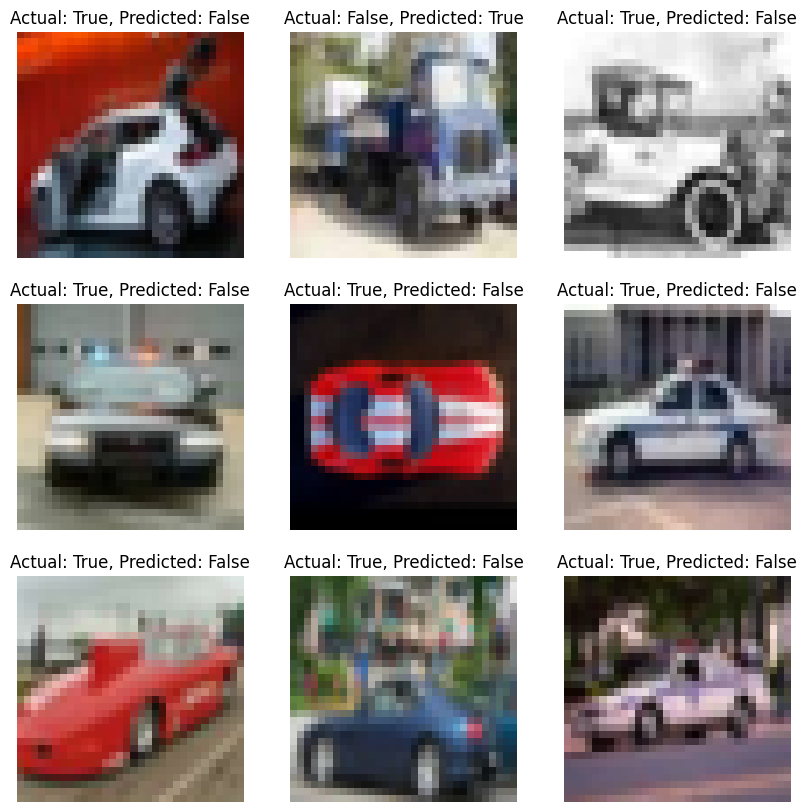

In [386]:
incorrect = (car_test_labels != test_predictions)
incorrect_images = test_images_reshaped[incorrect].reshape(-1, 32, 32, 3)  # Assuming original shape
actual_labels = car_test_labels[incorrect]
predicted_labels = test_predictions[incorrect]

plt.figure(figsize=(10, 10))
for i, image in enumerate(incorrect_images[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image, interpolation='none')
    plt.title(f'Actual: {actual_labels[i]}, Predicted: {predicted_labels[i]}')
    plt.axis('off')
plt.show()
